In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/Mastercard_stock_history.csv')

# EDA

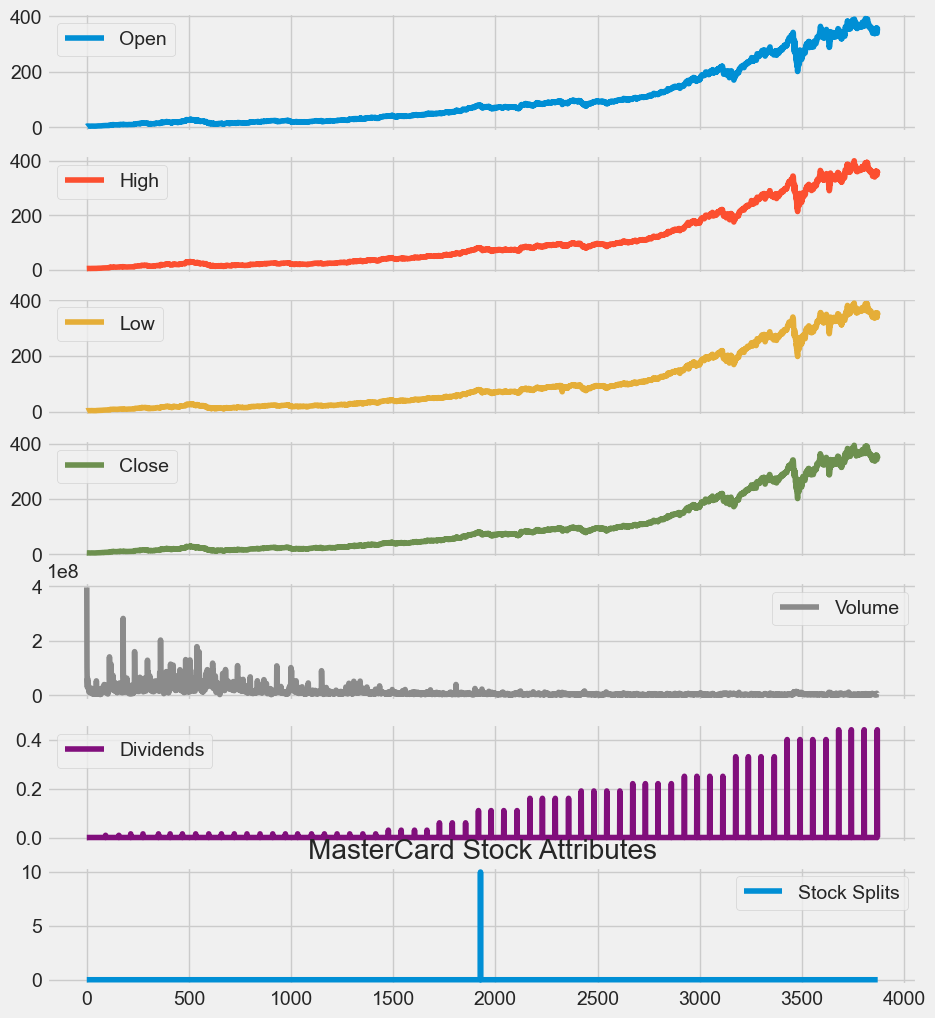

In [3]:
df.plot(subplots=True, figsize=(10,12))
plt.title('MasterCard Stock Attributes')
plt.show()

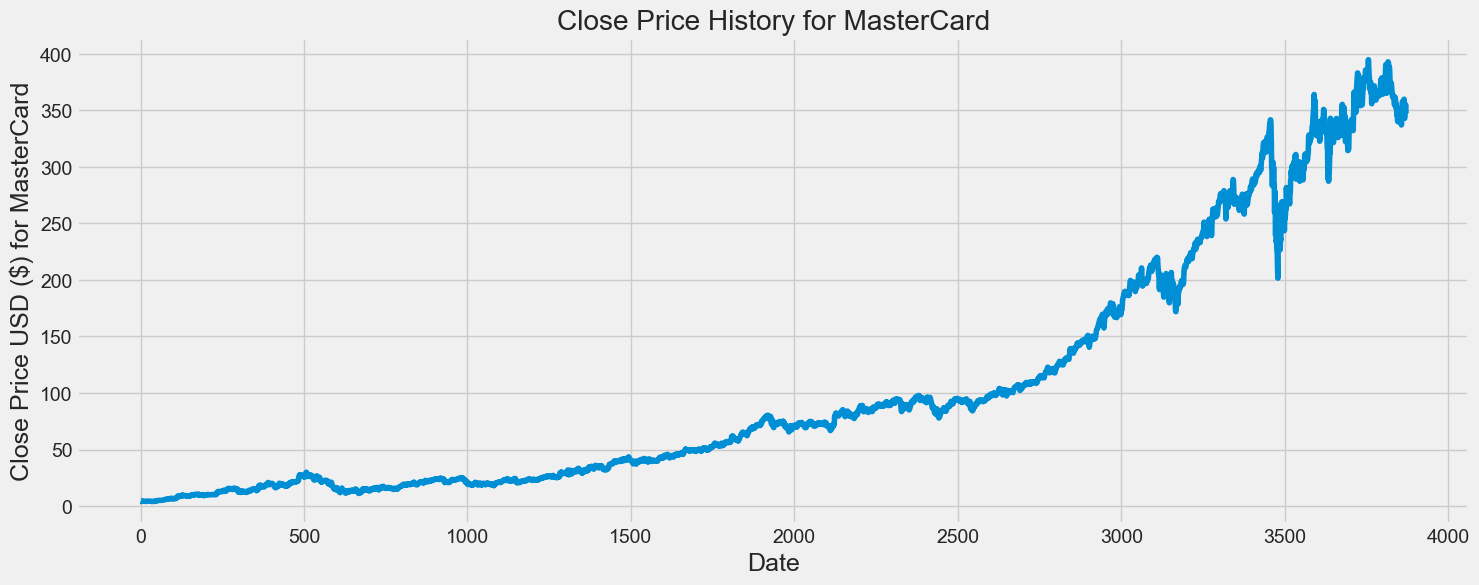

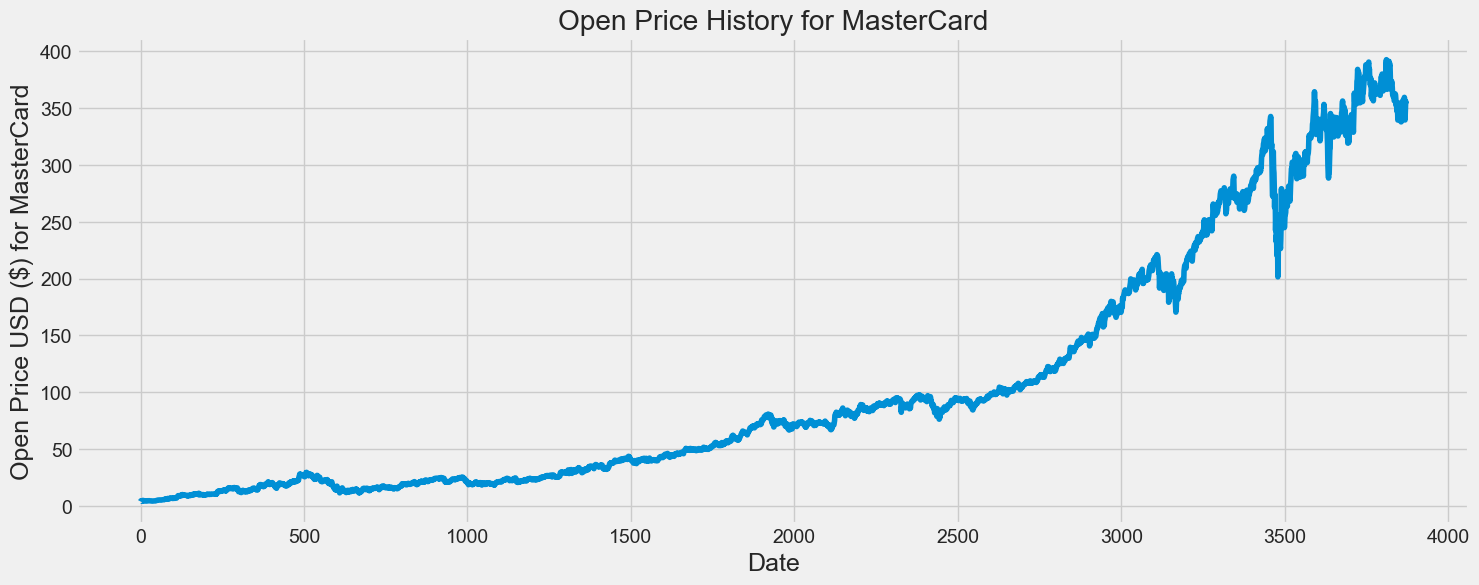

In [4]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(df, 'Close', 'MasterCard')
plot_close_val(df, 'Open',  'MasterCard')

# Basic Company Info

In [5]:
ma_info = pd.read_csv('./data/Mastercard_stock_info.csv', header=None, names=(['Description', 'Information']))

# ma_info.dropna()
ma_info.drop(ma_info.loc[ma_info['Information']=='nan'].index, inplace=True)
ma = ma_info.sort_values('Information').style
ma

,Description,Information
48,gmtOffSetMilliseconds,-14400000
137,ask,0
144,bid,0
107,trailingAnnualDividendYield,0.0048456164
146,dividendYield,0.0050999997
67,sharesPercentSharesOut,0.0055
99,shortPercentOfFloat,0.0063
57,52WeekChange,0.026370525
76,heldPercentInsiders,0.11034001
28,returnOnAssets,0.16448


<Axes: >

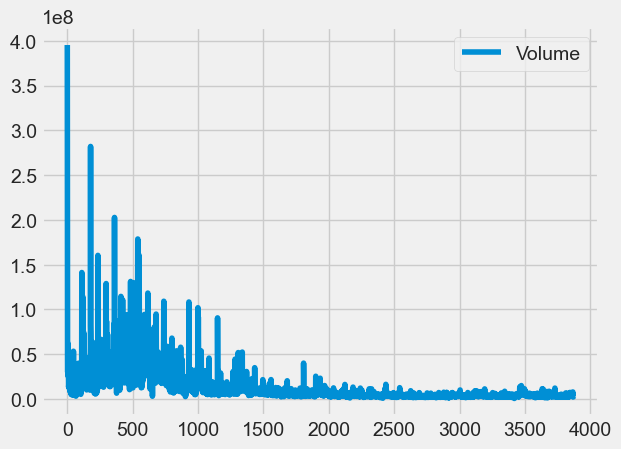

In [6]:
df[["Volume"]].plot()

# Basic CAGR

In [7]:
df = pd.read_csv('./data/Mastercard_stock_history.csv', header=0, index_col=0, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)

# GEt number of days in 'ma'
days = (df.index[-1] - df.index[0]).days

# Calculate The CAGR
cagr = ((((df['Close'][-1]) / df['Close'][1])) ** (365.0/days)) -1
# Print
print("The CAGR (Compound Annual Growth Rate) of MasterCard since IPO is ", round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of MasterCard since IPO is  33.26 % per year


# Basic Rolling Averages

In [8]:
# isoldate the adjusted closing prices
adj_close_px = df['Close']

# Calculate teh moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-09-28    354.386739
2021-09-29    354.026943
2021-09-30    353.519334
2021-10-01    353.225706
2021-10-04    352.468413
2021-10-05    351.782529
2021-10-06    351.304383
2021-10-07    351.057624
2021-10-08    350.893543
2021-10-11    350.514987
Name: Close, dtype: float64

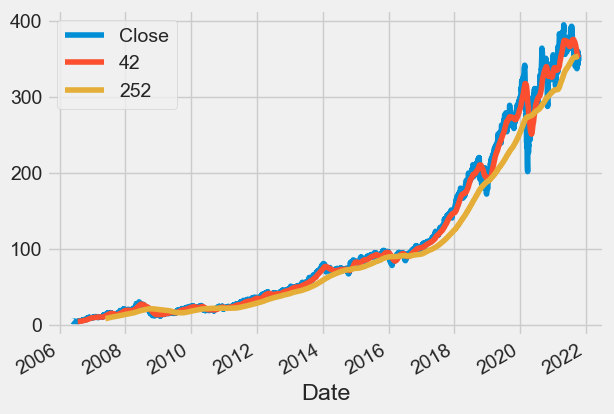

In [9]:
# Short mocing window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving windwo rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjust closing price, the short and long windows of rolling means
df[['Close', '42', '252']].plot()

plt.show()

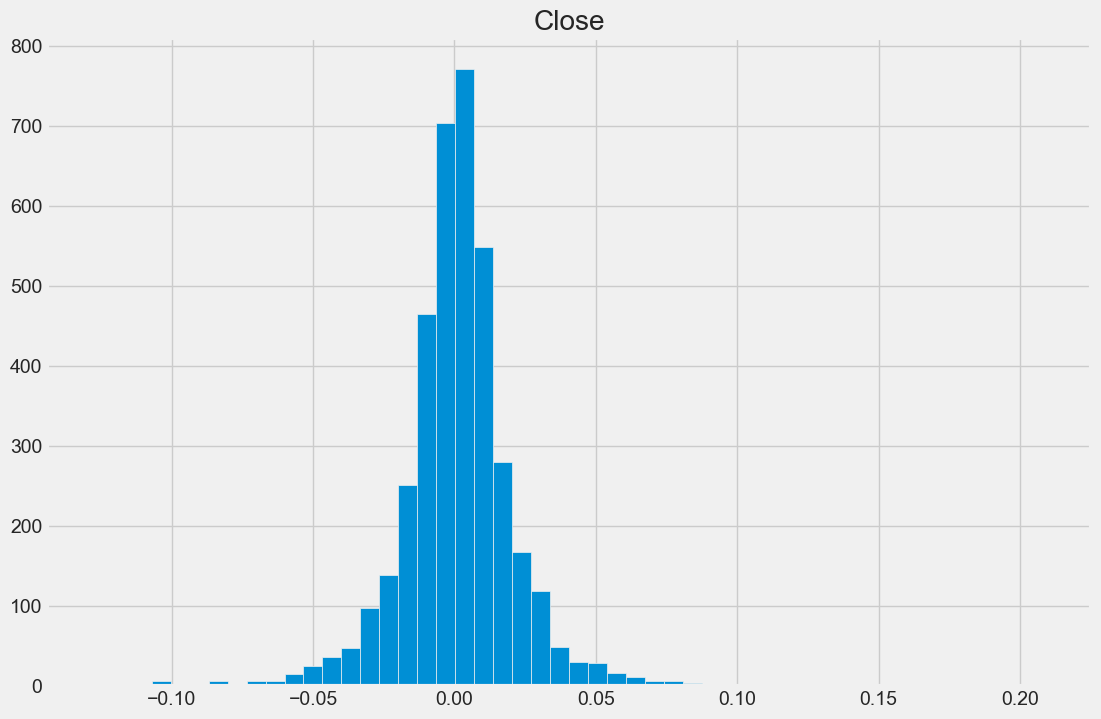

In [10]:
daily_close_px = df[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

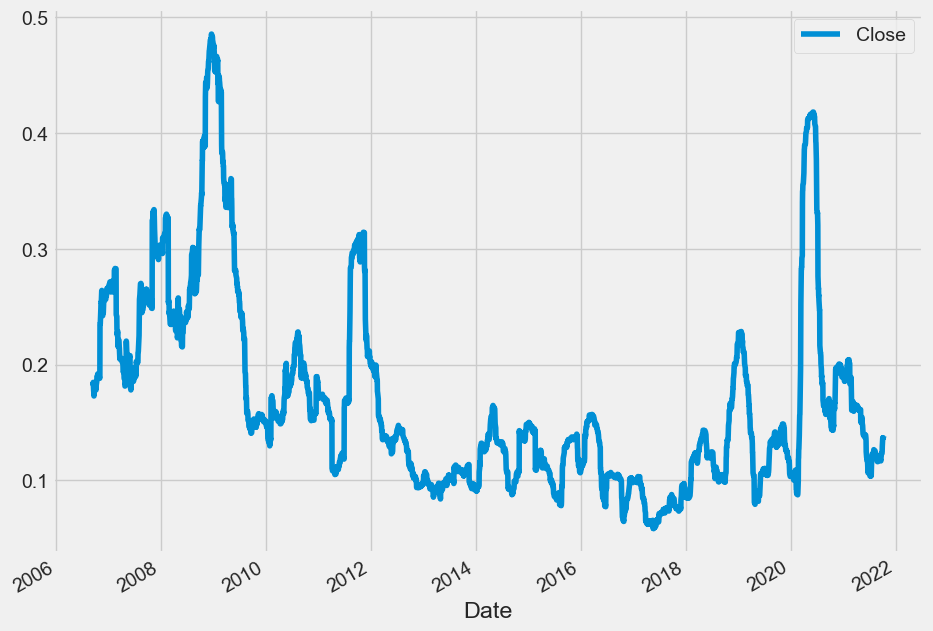

In [11]:
# Define the minimun opf periods to consider
min_periods = 75

# Calculate the volatility
vol =  daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

# plot the volatility
vol.plot(figsize=(10,8))

plt.show()

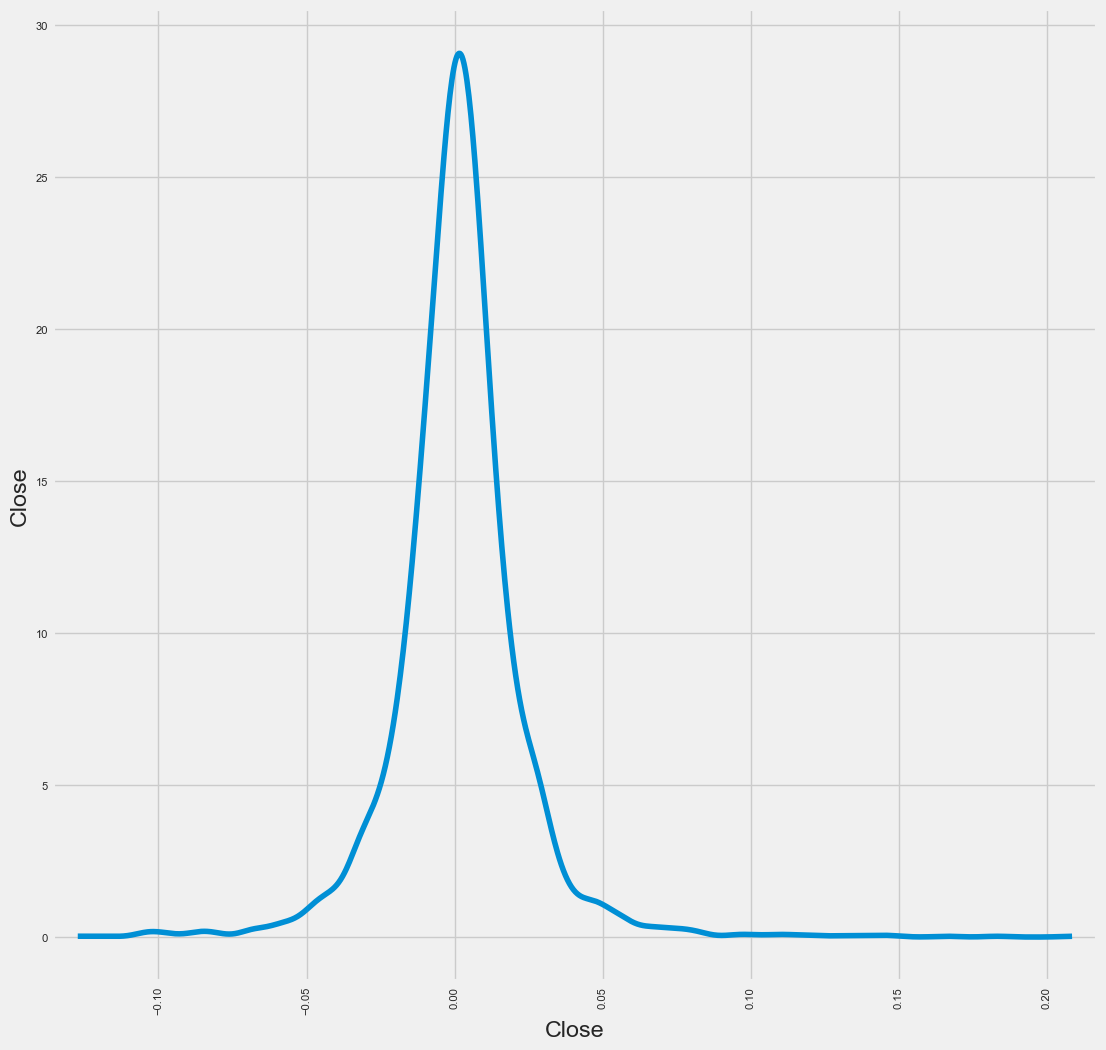

In [12]:
# PLot a scatter matrix with the 'daily_pct_change' data

pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))

plt.show()

# Basic MACD

In [13]:
import plotly.graph_objects as go

# Đảm bảo 'Date' là cột trong DataFrame
MA_Data = df.reset_index(drop=False)

# Vẽ biểu đồ OHLC
fig = go.Figure(data=go.Ohlc(
    x=MA_Data['Date'],
    open=MA_Data['Open'],
    high=MA_Data['High'],
    low=MA_Data['Low'],
    close=MA_Data['Close']
))

# Xuất ra file HTML
fig.write_html("ohlc_chart.html")


In [14]:
# Đảm bảo bỏ cột level_0 nếu nó tồn tại
df = df.reset_index(drop=False)

# Tính các đường trung bình động (SMA)
df['SMA5'] = df.Close.rolling(5).mean()
df['SMA20'] = df.Close.rolling(20).mean()
df['SMA50'] = df.Close.rolling(50).mean()
df['SMA200'] = df.Close.rolling(200).mean()
df['SMA500'] = df.Close.rolling(500).mean()

# Vẽ biểu đồ OHLC cùng với các đường SMA
fig = go.Figure(data=[
    go.Ohlc(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name="OHLC"),
    go.Scatter(x=df.Date, y=df.SMA5, line=dict(color='orange', width=1), name="SMA5"),
    go.Scatter(x=df.Date, y=df.SMA20, line=dict(color='green', width=1), name="SMA20"),
    go.Scatter(x=df.Date, y=df.SMA50, line=dict(color='blue', width=1), name="SMA50"),
    go.Scatter(x=df.Date, y=df.SMA200, line=dict(color='violet', width=1), name="SMA200"),
    go.Scatter(x=df.Date, y=df.SMA500, line=dict(color='purple', width=1), name="SMA500")
])

# Lưu biểu đồ dưới dạng tệp HTML
fig.write_html("ohlc_sma_chart.html")

In [15]:
# Đảm bảo bỏ cột level_0 nếu nó tồn tại
df = df.reset_index(drop=False)

# Tính các đường trung bình động (SMA)
df['SMA5'] = df.Close.ewm(span=5, adjust=False).mean()
df['SMA20'] = df.Close.ewm(span=20, adjust=False).mean()
df['SMA50'] = df.Close.ewm(span=50, adjust=False).mean()
df['SMA200'] = df.Close.ewm(span=200, adjust=False).mean()
df['SMA500'] = df.Close.ewm(span=500, adjust=False).mean()

# Vẽ biểu đồ OHLC cùng với các đường SMA
fig = go.Figure(data=[
    go.Ohlc(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name="OHLC"),
    go.Scatter(x=df.Date, y=df.SMA5, line=dict(color='orange', width=1), name="SMA5"),
    go.Scatter(x=df.Date, y=df.SMA20, line=dict(color='green', width=1), name="SMA20"),
    go.Scatter(x=df.Date, y=df.SMA50, line=dict(color='blue', width=1), name="SMA50"),
    go.Scatter(x=df.Date, y=df.SMA200, line=dict(color='violet', width=1), name="SMA200"),
    go.Scatter(x=df.Date, y=df.SMA500, line=dict(color='purple', width=1), name="SMA500")
])

# Lưu biểu đồ dưới dạng tệp HTML
fig.write_html("ohlc_sma_chart2.html")


In [16]:
df.set_index('Date')

,index,Open,High,Low,Close,Volume,Dividends,Splits,42,252,SMA5,SMA20,SMA50,SMA200,SMA500
Date,,,,,,,,,,,,,,,
2006-05-25,0,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0,NaN,NaN,4.279217,4.279217,4.279217,4.279217,4.279217
2006-05-26,1,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0,NaN,NaN,4.246038,4.269737,4.275314,4.278227,4.278820
2006-05-30,2,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0,NaN,NaN,4.195080,4.252921,4.268171,4.276385,4.278079
2006-05-31,3,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0,NaN,NaN,4.190256,4.246034,4.264737,4.275432,4.277690
2006-06-01,4,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0,NaN,NaN,4.266733,4.262572,4.270813,4.276868,4.278256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,3867,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0,351.782529,353.264527,347.753324,349.375773,354.931623,354.580376,323.751065
2021-10-06,3868,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0,351.304383,353.315549,347.918882,349.268556,354.669598,354.517387,323.848865
2021-10-07,3869,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0,351.057624,353.363513,349.915923,349.710599,354.639810,354.511343,323.968870


# ARIMA

In [17]:
df = df.set_index('Date')
df.index
x = df['Open'].resample('MS').mean()
x.head()

Date
2006-05-01    4.091304
2006-06-01    4.349791
2006-07-01    4.267356
2006-08-01    4.928380
2006-09-01    5.859737
Freq: MS, Name: Open, dtype: float64

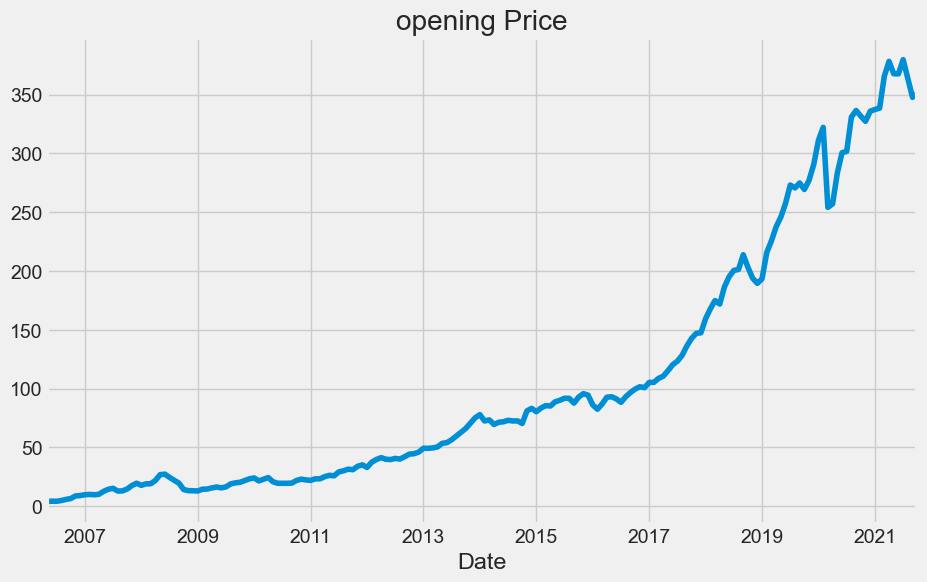

In [18]:
# Visualize time series of open price
x.plot(figsize=(10,6))
plt.title("opening Price")
plt.show()

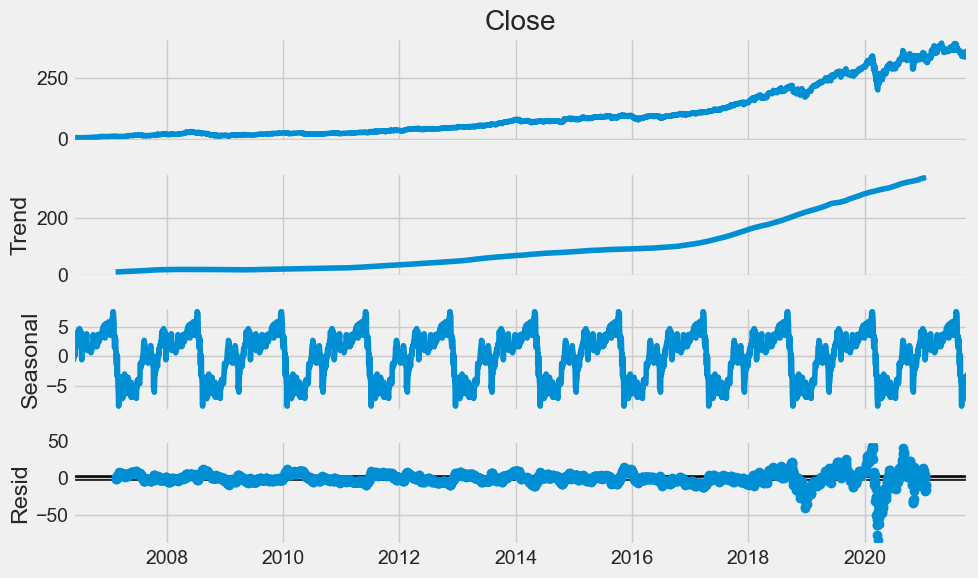

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Chọn chuỗi thời gian bạn muốn phân tích
x = df['Close']

# Cấu hình kích thước biểu đồ
rcParams['figure.figsize'] = 10,6

# Thực hiện phân tích mùa vụ (thêm tham số period)
decomposition = sm.tsa.seasonal_decompose(x, model='additive', period=365)  # Chỉnh sửa period theo chu kỳ của dữ liệu

# Vẽ biểu đồ kết quả
fig = decomposition.plot()
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

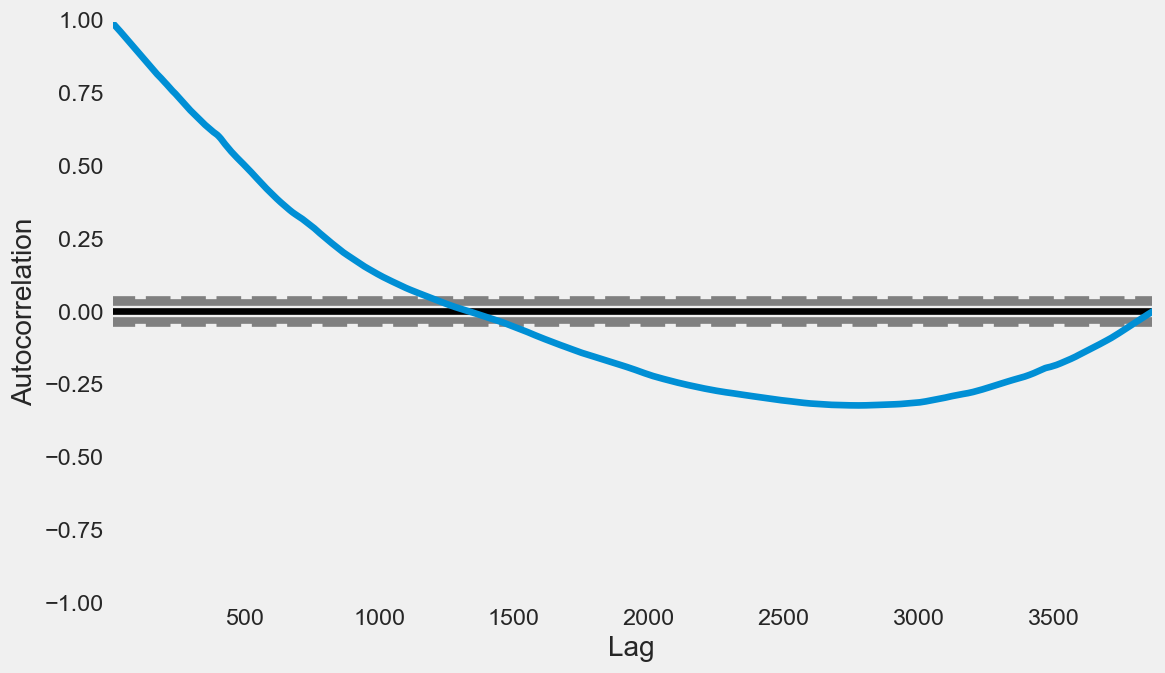

In [20]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [21]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
#selection of parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:49740.85794635155
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:44580.95199548817
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:27224.003679035985


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:27138.54266666183


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:27166.792006022653
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:27129.688808216997


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:27146.264151450967


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:27117.14842272472


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:44457.89853930846


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:39502.319383936054


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:24359.348552351934


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:24122.98257091644


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:24335.389147824237


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:24095.498711336095


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:24167.615890184847


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:24094.933862860395
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:19170.726639287313


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19124.17067584543
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:21826.179071814156


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:19117.801291857242
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:19128.05233932572


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:19125.796695571324


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:20551.283650949106


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:19124.534281787168
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:19116.58403678159


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:19070.3387310964
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:21768.75343368382


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:19061.580948236748


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:19078.16595393609


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:19071.93170218694
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:20490.243696718553


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:19063.550118445037
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:19173.94263074035


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:19127.22559756998
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:21586.950404742525


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:19124.08546549758


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:19127.142110055967


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:19128.85172152776


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20407.664528823152


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:19126.058977396788
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:19118.38564541616


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:19071.907078978493


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:21571.05340848428


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:19067.925198783887


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:19075.765069272304


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:19073.48928539237


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:20376.51356962542


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:19069.89564185941
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:19117.361725653063


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:19071.120420169962
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:21770.63975786976


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:19062.957380349097


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:19071.045674520403


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:19072.684236643465


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:20476.674846580376


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:19064.92498885597
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:19112.94087356946


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecastin

ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:19066.678531755857


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:21766.413528093144


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:19058.55292782497


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:19070.55607283386


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:19068.129207176942


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:20464.18672929205


c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:19060.555569918135


In [24]:
#fitting model
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\NMH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3060      0.037     -8.200      0.000      -0.379      -0.233
ma.L1          0.1870      0.038      4.861      0.000       0.112       0.262
ar.S.L12      -0.0003      0.006     -0.057      0.955      -0.012       0.011
ma.S.L12      -1.0098      0.002   -495.672      0.000      -1.014      -1.006
sigma2         8.0627      0.050    160.533      0.000       7.964       8.161


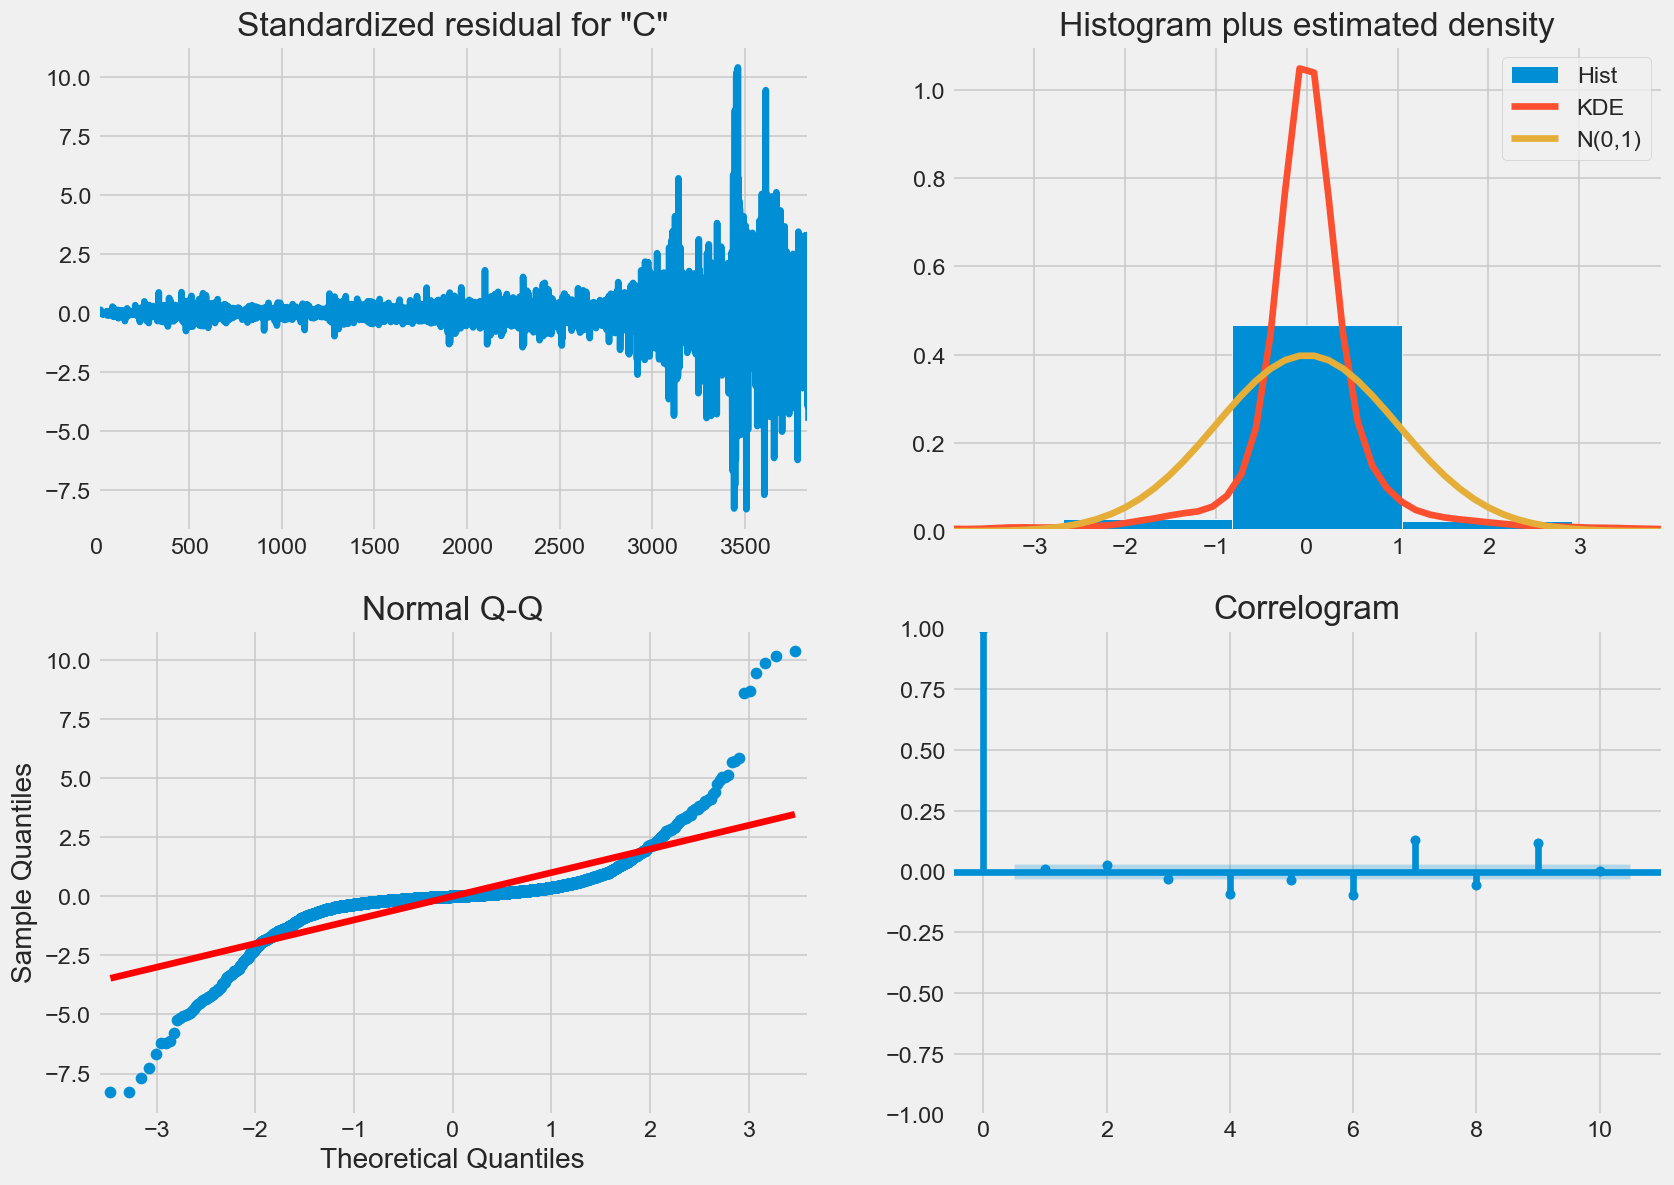

In [25]:
result.plot_diagnostics(figsize = (15, 11))
plt.show()